##Naive Bayes

In [ ]:
import pandas as pd
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
label_encoder_historia=LabelEncoder()
label_encoder_divida=LabelEncoder()
label_encoder_garantia=LabelEncoder()
label_encoder_renda=LabelEncoder()

###Base Risco

In [ ]:
base_risco=pd.read_csv('/content/drive/MyDrive/Dataset_Excel_CSV/risco_credito.csv')

In [ ]:
X_risco_credito=base_risco.iloc[:,0:4].values
y_risco_credito=base_risco.iloc[:,4].values

In [ ]:
X_risco_credito.shape, y_risco_credito.shape

((14, 4), (14,))

In [ ]:
X_risco_credito[:,0]=label_encoder_historia.fit_transform(X_risco_credito[:,0])
X_risco_credito[:,1]=label_encoder_divida.fit_transform(X_risco_credito[:,1])
X_risco_credito[:,2]=label_encoder_garantia.fit_transform(X_risco_credito[:,2])
X_risco_credito[:,3]=label_encoder_renda.fit_transform(X_risco_credito[:,3])

In [ ]:
X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [ ]:
with open('risco_credito.pkl','wb') as f:
  pickle.dump([X_risco_credito,y_risco_credito],f)

In [ ]:
naive_risco_credito=GaussianNB()
naive_risco_credito.fit(X_risco_credito,y_risco_credito)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
# História boa (0), divída alta (0), garantias nenhuma (1), renda > 35 (2)
# História ruim (2), dívida alta (0), garantias adequada (0), renda < 15 (0)
previsao=naive_risco_credito.predict([[0,0,1,2],[2,0,0,0]])

In [ ]:
previsao

array(['baixo', 'moderado'], dtype='<U8')

In [ ]:
naive_risco_credito.classes_

array(['alto', 'baixo', 'moderado'], dtype='<U8')

In [ ]:
naive_risco_credito.class_count_

array([6., 5., 3.])

In [ ]:
naive_risco_credito.class_prior_

array([0.42857143, 0.35714286, 0.21428571])

###Base Credit Data

In [ ]:
with open('/content/drive/MyDrive/Dataset_pkl/credit.pkl','rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste=pickle.load(f)

In [ ]:
X_credit_treinamento.shape, y_credit_treinamento.shape,  X_credit_teste.shape,y_credit_teste.shape

((1500, 3), (1500,), (500, 3), (500,))

In [ ]:
X_credit_treinamento

array([[-1.3754462 ,  0.50631087,  0.10980934],
       [ 1.45826409, -1.6489393 , -1.21501497],
       [-0.79356829,  0.22531191, -0.43370226],
       ...,
       [ 0.21738243, -0.14704404,  1.40872498],
       [ 0.58716195,  0.66435493,  0.67948086],
       [ 0.68315357,  0.04084946,  1.91819744]])

In [ ]:
naive_credit_data=GaussianNB()
naive_credit_data.fit(X_credit_treinamento,y_credit_treinamento)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
previsoes=naive_credit_data.predict(X_credit_teste)

In [ ]:
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
accuracy_score(y_credit_teste,previsoes)

0.938

In [ ]:
confusion_matrix(y_credit_teste,previsoes)

array([[428,   8],
       [ 23,  41]])

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


0.938

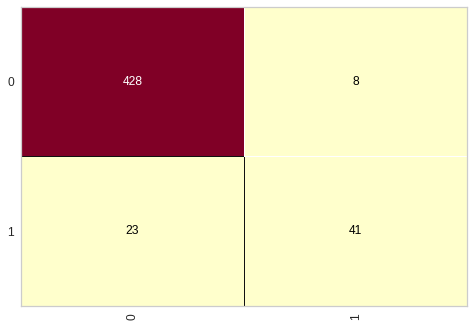

In [ ]:
cm=ConfusionMatrix(naive_credit_data)
cm.fit(X_credit_treinamento,y_credit_treinamento)
cm.score(X_credit_teste,y_credit_teste)

In [ ]:
print(classification_report(y_credit_teste,previsoes))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500



###Base Census

In [ ]:
with open('/content/drive/MyDrive/Dataset_pkl/census.pkl','rb') as f:
  X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste=pickle.load(f)

In [ ]:
X_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [ ]:
X_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [ ]:
naive_census=GaussianNB()
naive_census.fit(X_census_treinamento,y_census_treinamento)
previsoes=naive_census.predict(X_census_teste)

In [ ]:
accuracy_score(y_census_teste,previsoes)

0.4767656090071648

0.4767656090071648

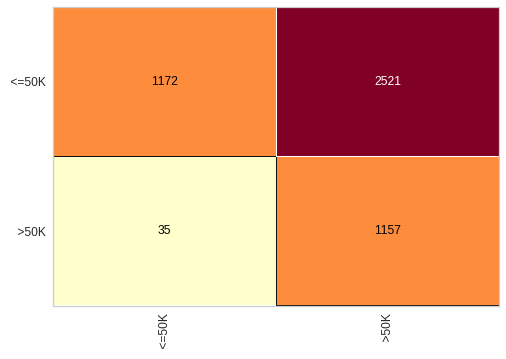

In [ ]:
cm=ConfusionMatrix(naive_census)
cm.fit(X_census_treinamento,y_census_treinamento)
cm.score(X_census_teste,y_census_teste)

In [ ]:
print(classification_report(y_census_teste,previsoes))

              precision    recall  f1-score   support

       <=50K       0.97      0.32      0.48      3693
        >50K       0.31      0.97      0.48      1192

    accuracy                           0.48      4885
   macro avg       0.64      0.64      0.48      4885
weighted avg       0.81      0.48      0.48      4885

